# PETR6397 Final Project: Oil Production Forecasting using Machine Learning

In [1]:
# Install required libraries

! pip install -q seaborn       # seaborn 
! pip install -q plotly        # plotly
! pip install -q matplotlib    # matplotlib
! pip install -q xgboost       # XGBoost
! pip install -q sklearn       # sklearn
! pip install -q scikit-learn  # scikit-learn:
! pip install -q statsmodels   # statsmodels
! pip install -q pmdarima      # pmdarima

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# ARIMA Model for Estimated Ultimate Recovery (EUR)
from statsmodels.tsa.arima.model import ARIMA
from itertools import product


ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


## Part 1.  Exploratory Data Analysis

In [2]:
# Load the two data files from data folder into one dataframe df

# read the first CSV file into a DataFrame
df = pd.read_csv('Data/MonthlyProduction.csv')

# Visualize df head
df.head(6)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number
0,130854587,4.210000e+13,4213538451,12/1/19,1.0,139.0,7,1,NaN,0.03,4.48,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1
1,130854587,4.210000e+13,4213538451,1/1/20,22.0,270.0,1205,1,NaN,0.71,8.71,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2
2,130854587,4.210000e+13,4213538451,2/1/20,15.0,130.0,846,1,NaN,0.52,4.48,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3
3,130854587,4.210000e+13,4213538451,3/1/20,14.0,308.0,788,1,NaN,0.45,9.94,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4
4,130854587,4.210000e+13,4213538451,4/1/20,13.0,268.0,773,1,NaN,0.43,8.93,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5
5,130854587,4.210000e+13,4213538451,5/1/20,9.0,31.0,546,1,NaN,0.29,1.00,17.61,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,6


In [3]:
# Visualize df tail
df.tail(6)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number
386642,127799434,4.210000e+13,4213533443,8/1/22,8.0,0.0,289,1,NaN,0.26,0.0,9.32,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,496
386643,127799434,4.210000e+13,4213533443,9/1/22,8.0,0.0,287,1,NaN,0.27,0.0,9.57,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,497
386644,127799434,4.210000e+13,4213533443,10/1/22,7.0,0.0,240,1,NaN,0.23,0.0,7.74,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,498
386645,127799434,4.210000e+13,4213533443,11/1/22,9.0,0.0,294,1,NaN,0.30,0.0,9.80,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,499
386646,127799434,4.210000e+13,4213533443,12/1/22,9.0,0.0,298,1,NaN,0.29,0.0,9.61,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,500
386647,127799434,4.210000e+13,4213533443,1/1/23,9.0,0.0,308,1,NaN,0.29,0.0,9.94,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,501


In [4]:
# check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (386648, 20)


In [5]:
# check the shape of the DataFrame after dropping duplicates value (if any)
df.drop_duplicates()
print("Shape of the DataFrame:", df.shape)                            


Shape of the DataFrame: (386648, 20)


It seems their are 'No duplicates' in the dataset.

In [6]:
# Data Profiling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386648 entries, 0 to 386647
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Entity ID                386648 non-null  int64  
 1   API/UWI                  386648 non-null  float64
 2   API/UWI List             386648 non-null  object 
 3   Monthly Production Date  386648 non-null  object 
 4   Monthly Oil              386458 non-null  float64
 5   Monthly Gas              386470 non-null  float64
 6   Monthly Water            386648 non-null  int64  
 7   Well Count               386648 non-null  int64  
 8   Days                     13502 non-null   float64
 9   Daily Avg Oil            386458 non-null  float64
 10  Daily Avg Gas            386470 non-null  float64
 11  Daily Avg Water          386648 non-null  float64
 12  Reservoir                385306 non-null  object 
 13  Well/Lease Name          386648 non-null  object 
 14  Well

In [7]:
# Checking Production type

production_types = df['Production Type'].unique()
print("Unique Production Types:", production_types)

Unique Production Types: ['OIL' 'GAS']


We have two types of Production in the datset. 

As we are focussed only into oil production; We will filter column 'Production Type' to 'Oil'

In [8]:
# Filter dataset for only for oil production type
df = df[df['Production Type'] == 'OIL']
df

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number
0,130854587,4.210000e+13,4213538451,12/1/19,1.0,139.0,7,1,NaN,0.03,4.48,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1
1,130854587,4.210000e+13,4213538451,1/1/20,22.0,270.0,1205,1,NaN,0.71,8.71,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2
2,130854587,4.210000e+13,4213538451,2/1/20,15.0,130.0,846,1,NaN,0.52,4.48,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3
3,130854587,4.210000e+13,4213538451,3/1/20,14.0,308.0,788,1,NaN,0.45,9.94,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4
4,130854587,4.210000e+13,4213538451,4/1/20,13.0,268.0,773,1,NaN,0.43,8.93,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386643,127799434,4.210000e+13,4213533443,9/1/22,8.0,0.0,287,1,NaN,0.27,0.00,9.57,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,497
386644,127799434,4.210000e+13,4213533443,10/1/22,7.0,0.0,240,1,NaN,0.23,0.00,7.74,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,498
386645,127799434,4.210000e+13,4213533443,11/1/22,9.0,0.0,294,1,NaN,0.30,0.00,9.80,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,499
386646,127799434,4.210000e+13,4213533443,12/1/22,9.0,0.0,298,1,NaN,0.29,0.00,9.61,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,500


In [9]:
# check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (385854, 20)


In [10]:
# print total well count in the dataset
well_count = df['Entity ID'].nunique()
print("Total number of unique oil producing wells:", well_count)

Total number of unique oil producing wells: 1046


In [11]:
# We can create a new column Gas to Oil Ratio (i.e GOR) which is important parameter in oil production
df['GOR'] = df['Monthly Gas'] / df['Monthly Oil']
df.head(10)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,...,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number,GOR
0,130854587,4.210000e+13,4213538451,12/1/19,1.0,139.0,7,1,NaN,0.03,...,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1,139.000000
1,130854587,4.210000e+13,4213538451,1/1/20,22.0,270.0,1205,1,NaN,0.71,...,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2,12.272727
2,130854587,4.210000e+13,4213538451,2/1/20,15.0,130.0,846,1,NaN,0.52,...,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3,8.666667
3,130854587,4.210000e+13,4213538451,3/1/20,14.0,308.0,788,1,NaN,0.45,...,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4,22.000000
4,130854587,4.210000e+13,4213538451,4/1/20,13.0,268.0,773,1,NaN,0.43,...,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5,20.615385
5,130854587,4.210000e+13,4213538451,5/1/20,9.0,31.0,546,1,NaN,0.29,...,17.61,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,6,3.444444
6,130854587,4.210000e+13,4213538451,6/1/20,6.0,0.0,395,1,NaN,0.20,...,13.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,7,0.000000
7,130854587,4.210000e+13,4213538451,7/1/20,6.0,244.0,435,1,NaN,0.19,...,14.03,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,8,40.666667
8,130854587,4.210000e+13,4213538451,8/1/20,12.0,262.0,832,1,NaN,0.39,...,26.84,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,9,21.833333
9,130854587,4.210000e+13,4213538451,9/1/20,10.0,188.0,698,1,NaN,0.33,...,23.27,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,10,18.800000


In [12]:
# Information about Data type 
df.dtypes

Entity ID                    int64
API/UWI                    float64
API/UWI List                object
Monthly Production Date     object
Monthly Oil                float64
Monthly Gas                float64
Monthly Water                int64
Well Count                   int64
Days                       float64
Daily Avg Oil              float64
Daily Avg Gas              float64
Daily Avg Water            float64
Reservoir                   object
Well/Lease Name             object
Well Number                 object
Operator Company Name       object
Production Type             object
Production Status           object
Entity Type                 object
Producing Month Number       int64
GOR                        float64
dtype: object

In [13]:
# summary statistics for numerical columns
df.describe()

,Entity ID,API/UWI,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Producing Month Number,GOR
count,3.858540e+05,3.858540e+05,385854.000000,385676.000000,3.858540e+05,385854.000000,12900.0,385854.000000,385676.000000,385854.000000,385854.000000,3.855990e+05
mean,1.264904e+08,4.210000e+13,537.069617,503.662564,7.410641e+03,1.020899,0.0,17.644106,16.543608,243.457731,257.579139,inf
std,1.194819e+07,0.000000e+00,1103.490253,2571.976392,1.861663e+04,0.272107,0.0,36.237795,84.439632,611.548984,194.597442,NaN
min,4.748530e+05,4.210000e+13,0.000000,0.000000,0.000000e+00,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1.273339e+08,4.210000e+13,91.000000,15.000000,6.240000e+02,1.000000,0.0,3.000000,0.480000,20.550000,95.000000,6.544235e-02
50%,1.275302e+08,4.210000e+13,230.000000,67.000000,2.986000e+03,1.000000,0.0,7.570000,2.230000,98.100000,214.000000,2.777778e-01
75%,1.277265e+08,4.210000e+13,561.000000,280.000000,7.428000e+03,1.000000,0.0,18.420000,9.230000,243.740000,389.000000,1.059701e+00
max,1.310139e+08,4.210000e+13,35382.000000,190132.000000,1.411641e+06,9.000000,0.0,1141.350000,6133.290000,45536.810000,997.000000,inf


In [14]:
# check for any missing values
print("\n Number of missing values:")
df.isna().sum()


 Number of missing values:


Entity ID                       0
API/UWI                         0
API/UWI List                    0
Monthly Production Date         0
Monthly Oil                     0
Monthly Gas                   178
Monthly Water                   0
Well Count                      0
Days                       372954
Daily Avg Oil                   0
Daily Avg Gas                 178
Daily Avg Water                 0
Reservoir                    1342
Well/Lease Name                 0
Well Number                  3433
Operator Company Name           0
Production Type                 0
Production Status               0
Entity Type                     0
Producing Month Number          0
GOR                           255
dtype: int64

We observe that there are three common features to distinguish between wells, namely 'Entity ID', 'API/UWi', and 'API/UWI List,' all having the same significance in identifying a particular well. Therefore, any one of these features can be considered to uniquely identify a well. In this case, we are identifying a well with its unique 'Entity ID' and will drop the 'API/UWi' and 'API/UWI List' features.

Furthermore, the 'Days' and 'Well Number' columns have only 27,004 values out of a total of 773,296 rows, making imputation methods unsuitable for handling missing value issues, as they may introduce bias into the dataset. Therefore, to achieve better efficiency, we recommend dropping the 'Days' and 'Well Number' columns.

In [15]:
# drop the 'API/UWI','API/UWI List','Days','Well Number' columns
df = df.drop(columns=['API/UWI','API/UWI List','Days','Well Number'])
df.isna().sum()

Entity ID                     0
Monthly Production Date       0
Monthly Oil                   0
Monthly Gas                 178
Monthly Water                 0
Well Count                    0
Daily Avg Oil                 0
Daily Avg Gas               178
Daily Avg Water               0
Reservoir                  1342
Well/Lease Name               0
Operator Company Name         0
Production Type               0
Production Status             0
Entity Type                   0
Producing Month Number        0
GOR                         255
dtype: int64

Upon observing the data, we note a significant difference between the mean and median values for monthly oil production, where the mean is 536.23 and the median is 229. Therefore, replacing the missing values with the median of non-missing values is the optimal imputation method. This method is more robust to outliers than mean imputation and is suitable for skewed or outlier-containing data. Thus, we will impute the median values for 'Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas', and 'GOR'. Additionally, while computing the 'GOR' column, we encountered division errors resulting in 'inf' values, which can also be imputed using the median imputation method.

Finally, we will use mode imputation to impute the missing values in the categorical feature 'Reservoir' column.

In [16]:
# Imputation for missing values 

# A) impute missing values with median for numerical columns i.e. 'Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas'
num_cols = ['Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas','GOR']
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# replace division error values in the GOR column with the median of the column
median_GOR = df['GOR'].replace([np.inf, -np.inf], np.nan).median()
df['GOR'] = df['GOR'].replace([np.inf, -np.inf], median_GOR)

# B) Now lets impute object feature 'Reservoir' with mode
df['Reservoir'].fillna(df['Reservoir'].mode()[0], inplace=True)

df.isna().sum()

Entity ID                  0
Monthly Production Date    0
Monthly Oil                0
Monthly Gas                0
Monthly Water              0
Well Count                 0
Daily Avg Oil              0
Daily Avg Gas              0
Daily Avg Water            0
Reservoir                  0
Well/Lease Name            0
Operator Company Name      0
Production Type            0
Production Status          0
Entity Type                0
Producing Month Number     0
GOR                        0
dtype: int64

In [17]:
# Analyzing other categorical feature
unique_operators = df['Operator Company Name'].unique()
unique_production_types = df['Production Type'].unique()
unique_entity_types = df['Entity Type'].unique()
unique_production_statuses = df['Production Status'].unique()

print("Unique Operator Company Name:", unique_operators)
print("Unique Production Type:", unique_production_types)
print("Unique Production Statuses:", unique_production_statuses)
print("Unique Entity Types:", unique_entity_types)


Unique Operator Company Name: ['OCCIDENTAL PETROLEUM']
Unique Production Type: ['OIL']
Unique Production Statuses: ['ACTIVE']
Unique Entity Types: ['COM' 'LEASE']


As observed above, the categorical features 'Operator Company Name', 'Production Type', and 'Production Status' have only one value, which does not offer much information. Therefore, it is recommended to drop the features 'Operator Company Name' and 'Production Status' from the dataset.

In [18]:
# drop the 'Operator Company Name','Production Type','Production Status' columns

df = df.drop(columns=['Operator Company Name','Production Type','Production Status'])
df.isna().sum()

Entity ID                  0
Monthly Production Date    0
Monthly Oil                0
Monthly Gas                0
Monthly Water              0
Well Count                 0
Daily Avg Oil              0
Daily Avg Gas              0
Daily Avg Water            0
Reservoir                  0
Well/Lease Name            0
Entity Type                0
Producing Month Number     0
GOR                        0
dtype: int64

In [19]:
# # Export the Cleaned data to a CSV file for Visualising with PowerBI

df.to_csv('cleaned_dataset.csv', index=False)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

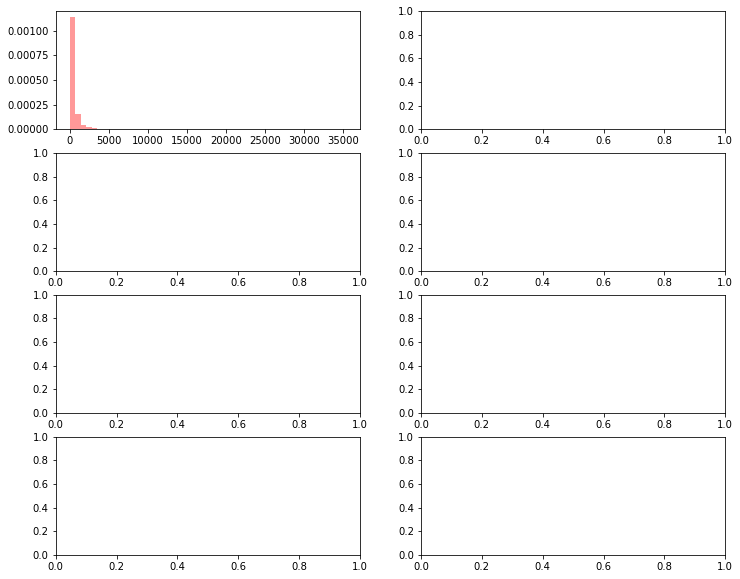

In [21]:
#let’s visualize the distribution of each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 10))
sns.distplot(df['Monthly Oil'] , color="red", ax=axes[0, 0])
sns.distplot(df['Daily Avg Oil'] , color="brown", ax=axes[0, 1])
sns.distplot(df['Monthly Gas'] , color="olive", ax=axes[1, 0])
sns.distplot(df['Daily Avg Gas'] , color="green", ax=axes[1, 1])
sns.distplot(df['Monthly Water'] , color="blue", ax=axes[2, 0])
sns.distplot(df['Daily Avg Water'] , color="cyan", ax=axes[2, 1])
sns.distplot(df['Well Count'] , color="orange", ax=axes[3, 0])
sns.distplot(df['GOR'] , color="yellow", ax=axes[3, 1])

plt.tight_layout()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

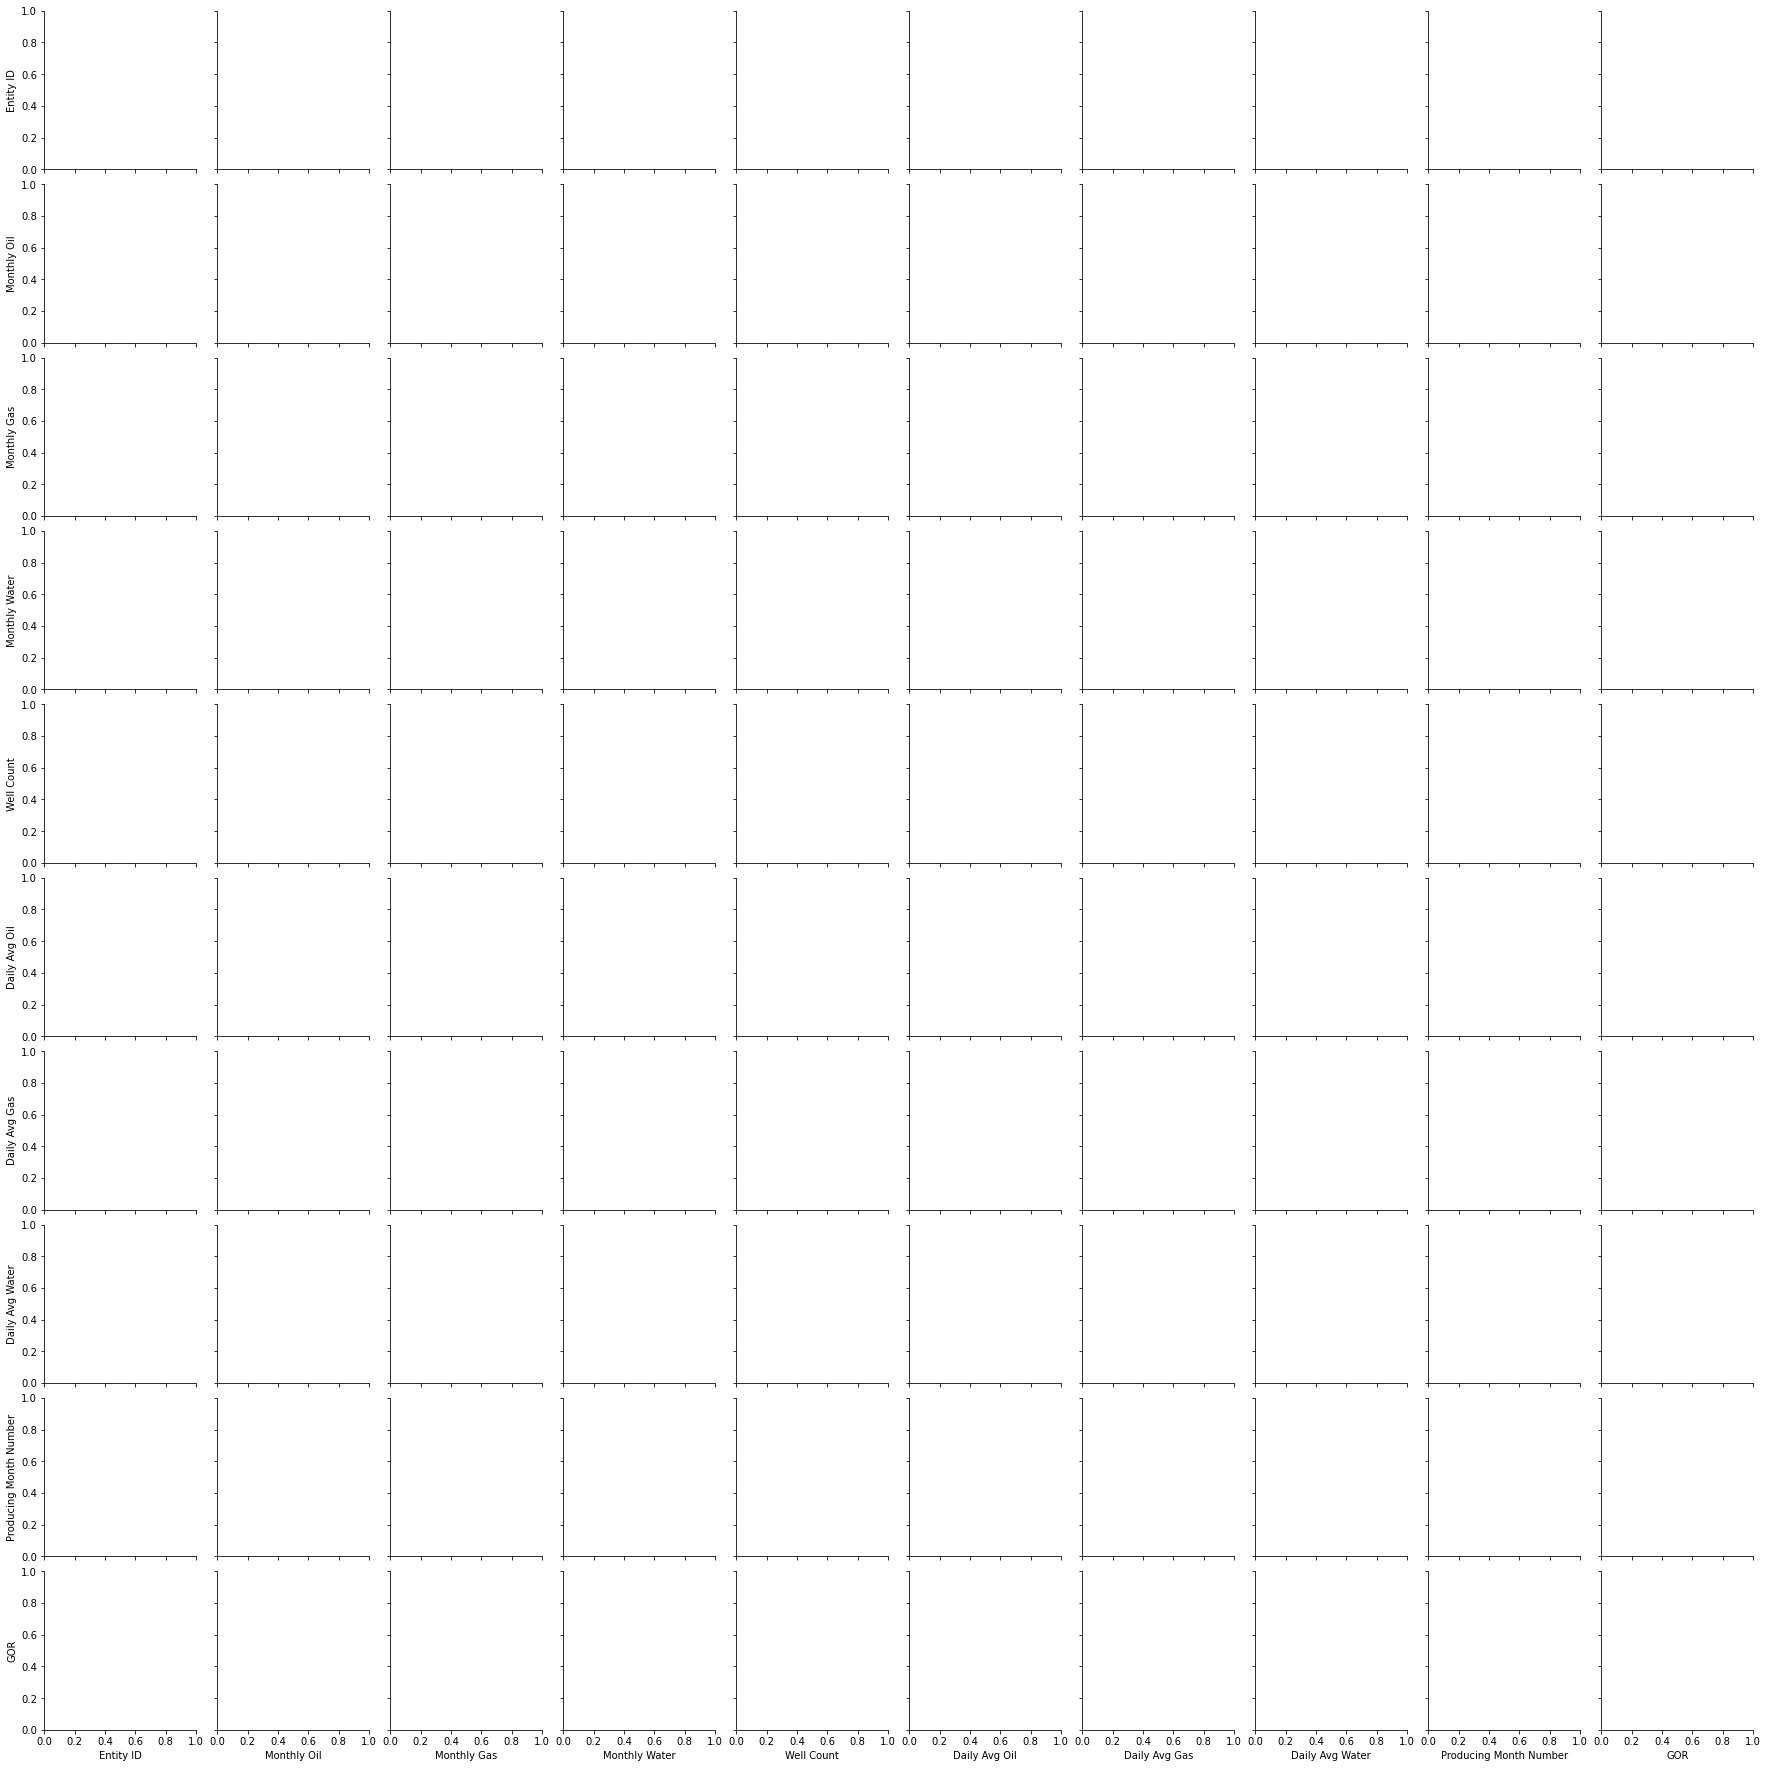

In [22]:
# Checking any correlations between each other using a pairplot graph   (Note: Compuation time = approx 8-10 min)

sns.pairplot(df)

In [23]:
# Lets find any collinearity between input features using seaborn library

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

ValueError: could not convert string to float: '12/1/19'

<Figure size 720x432 with 0 Axes>

In [24]:
# calculate the correlation coefficients with the target variable
corr_matrix = df.corr(method='pearson')['Monthly Oil'].sort_values(ascending=False)

# Create a bar plot of the correlation matrix
fig, ax = plt.subplots(figsize=(8,4))
colors = np.where(corr_matrix.values > 0, 'g', 'r')
ax.bar(corr_matrix.index, corr_matrix.values, color=colors)

# Set the title and axis labels
ax.set_title('Absolute Correlation of Monthly Oil Production with Other Variables')
ax.set_xlabel('Variable')
ax.set_ylabel('Correlation')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=78)

# Annotate the correlation values on the bars
for i, v in enumerate(corr_matrix.values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Show the plot
plt.show()

ValueError: could not convert string to float: '12/1/19'

It is evident that 'Monthly Oil' production is strongly correlated with 'Daily Avg Oil'. Similarly, 'Monthly Water' and 'Monthly Gas' exhibit a high correlation with 'Daily Water' and 'Daily Gas'. As a result, to reduce the complexity of the model and avoid multicollinearity issues, it is generally recommended to remove one of the correlated features. 

Thus, while implementing the model, it is advisable to ignore these highly correlated features, namely 'Daily Avg Oil', 'Daily Water', and 'Daily Gas' to avoid multicollinearity issues.

## Part 2.  Implementing Machine Learning Models

### a. Data Transformation & Splitting it into Training, Validation & Test Dataset

In [25]:
from datetime import datetime

df['Monthly Production Date'] = pd.to_datetime(df['Monthly Production Date'])
today = datetime.now().date()
df = df[df['Monthly Production Date'].dt.date <= today]
unique_dates = df['Monthly Production Date'].unique()
unique_dates = sorted(unique_dates, reverse=True)
latest_dates = unique_dates[:4]
test_df = df[df['Monthly Production Date'].isin(latest_dates)]
mask = df['Monthly Production Date'].isin(latest_dates)
df = df.drop(df[mask].index)


In [26]:
df['Type'] = "Train"
test_df['Type'] = "Test"

df.to_excel('train_visualization.xlsx', sheet_name='Sheet1', index=False)
test_df.to_excel('test_visualization.xlsx', sheet_name='Sheet1', index=False)


In [27]:
# Load the dataset and create the features and target variable
X = df[['Entity ID','Monthly Gas','Monthly Water','Well Count','Producing Month Number','GOR']]
y = df['Monthly Oil']

from sklearn.preprocessing import StandardScaler

# create and fit into StandardScaler for X
scaler_X = StandardScaler().fit(X)

# transform features in X 
X_scaled = scaler_X.transform(X)

# create and fit into StandardScaler for y
scaler_y = StandardScaler().fit(y.to_numpy().reshape(-1, 1))

# transform target features y
y_scaled = scaler_y.transform(y.to_numpy().reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### b.  Multiple Model Implementation

In [28]:
# Implement & fit the models using GridsearchCV & Kfold cross validation

# Create K-fold cross validation for GridSearch calculations
cv = KFold(n_splits=5)

# 1. Linear Regression
lr_param_grid = {'fit_intercept': [True, False]}
lr = GridSearchCV(LinearRegression(),lr_param_grid,cv=cv).fit(X_train, y_train)

In [29]:
# 2. Ridge Regression
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
ridge = GridSearchCV(Ridge(random_state=42), ridge_param_grid, cv=cv).fit(X_train, y_train)

In [30]:
# 3. Lasso Regression
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
lasso = GridSearchCV(Lasso(random_state=42), lasso_param_grid, cv=cv).fit(X_train, y_train)

In [31]:
# 4. KNN                                     (Note: Compuation time = approx 5 min)
knn_param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=cv).fit(X_train, y_train)

In [32]:
# 5. Decision Tree
tree_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}
dtree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=cv).fit(X_train, y_train)

In [33]:
# 6. RandomForest                             (Note: Compuation time = approx 5-9-12 min)
rforest_param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': ['sqrt', 'log2']}
rforest = GridSearchCV(RandomForestRegressor(random_state=42),rforest_param_grid, cv=cv).fit(X_train, y_train)

In [34]:
# 7. XGBoost                                  (Note: Compuation time = approx 6-12-15 min)
xgb_param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 20, 30]}
xgboost = GridSearchCV(xgb.XGBRegressor(random_state=42),xgb_param_grid, cv=cv).fit(X_train, y_train)

### c. Validating all the Model Evaluation on the Validation dataset

Model Evaluation on Validation data

Linear Regression:
R2 score: 0.3568165255066431
RMSE: 0.8081710403936948

Ridge:
R2 score: 0.3568006595383406
RMSE: 0.8081810082625408

Lasso:
R2 score: 0.35573657364110156
RMSE: 0.8088492448228151

KNN:
R2 score: 0.7975822954639203
RMSE: 0.45337763548602944

Decision Tree:
R2 score: 0.976195817159396
RMSE: 0.15547568685247978

Random Forest:
R2 score: 0.9828960699319104
RMSE: 0.13179040769231284

XGBoost:
R2 score: 0.9873166111884202
RMSE: 0.1134889292136221


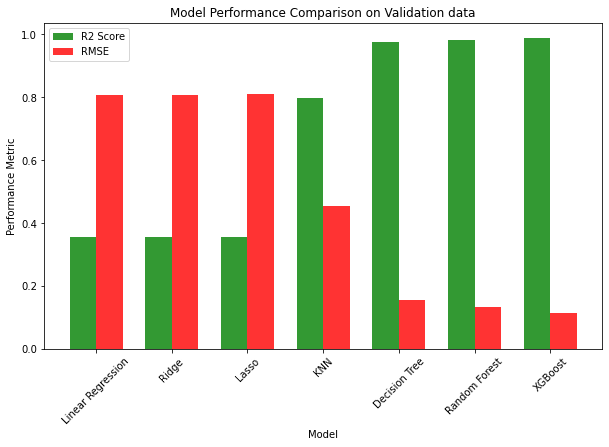

In [35]:
# Evaluate all the models on Validation data set

models = [lr, ridge, lasso, knn, dtree, rforest, xgboost]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'XGBoost']

best_models = []

results = {'Model': [], 'R2 Score': [], 'RMSE': []}

print('Model Evaluation on Validation data')
for i, model in enumerate(models):
    y_val_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    results['Model'].append(model_names[i])
    results['R2 Score'].append(r2)
    results['RMSE'].append(np.sqrt(mse))
    print(f"\n{model_names[i]}:")
    print(f"R2 score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")
    
results_df = pd.DataFrame(results)

# Create a grouped bar chart with both R2 and RMSE
plt.figure(figsize=(10,6))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(model_names))

rects1 = plt.bar(index, results_df['R2 Score'], bar_width, alpha=opacity, color='green', label='R2 Score')
rects2 = plt.bar(index + bar_width, results_df['RMSE'], bar_width, alpha=opacity, color='red', label='RMSE')

plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Model Performance Comparison on Validation data')
plt.xticks(index + bar_width/2, model_names, rotation=45)
plt.legend()

plt.show()

### d. Final Model Performances comparison on the Testing dataset

Final Model Evaluation on Test data

Linear Regression:
R2 score: 0.35234160210153775
RMSE: 0.7993522060653208

Ridge:
R2 score: 0.35234369756501394
RMSE: 0.7993509129340091

Lasso:
R2 score: 0.35215430730704744
RMSE: 0.7994677790937221

KNN:
R2 score: 0.8205785915638504
RMSE: 0.42072886431125966

Decision Tree:
R2 score: 0.9805813032657967
RMSE: 0.13841246940703514

Random Forest:
R2 score: 0.9860833825587372
RMSE: 0.1171742066515794

XGBoost:
R2 score: 0.9883910600439125
RMSE: 0.10701914075251256


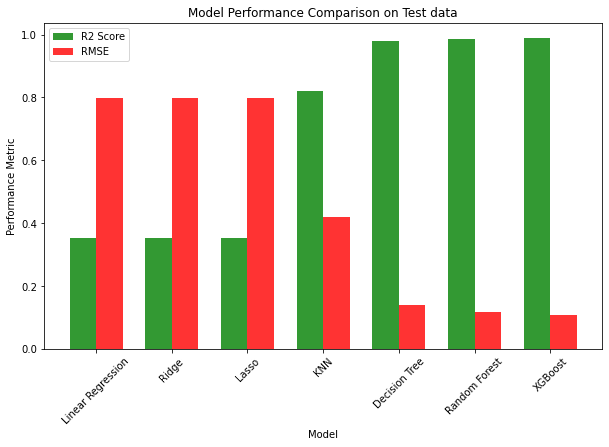

In [36]:
 # Evaluate all the models on Testing data set

models = [lr, ridge, lasso, knn, dtree, rforest, xgboost]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'XGBoost']
best_models = []

results = {'Model': [], 'R2 Score': [], 'RMSE': []}

print('Final Model Evaluation on Test data')
for i, model in enumerate(models):
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    results['Model'].append(model_names[i])
    results['R2 Score'].append(r2)
    results['RMSE'].append(np.sqrt(mse))
    print(f"\n{model_names[i]}:")
    print(f"R2 score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")
    
results_df = pd.DataFrame(results)

# Create a grouped bar chart with both R2 and RMSE
plt.figure(figsize=(10,6))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(model_names))

rects1 = plt.bar(index, results_df['R2 Score'], bar_width, alpha=opacity, color='green', label='R2 Score')
rects2 = plt.bar(index + bar_width, results_df['RMSE'], bar_width, alpha=opacity, color='red', label='RMSE')

plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Model Performance Comparison on Test data')
plt.xticks(index + bar_width/2, model_names, rotation=45)
plt.legend()

plt.show()


### e. Visualizing all the Model Predictions on Testing dataset

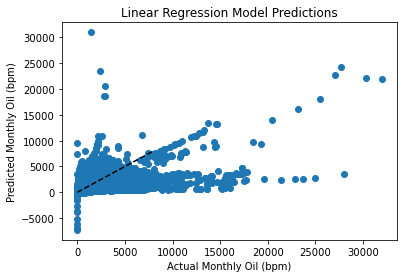

In [37]:
# Lets Inverse transform the scaled target variable to original target variables
y_test_org = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# A) Linear Regression Model Predictions on Testing data set
y_pred_lr= lr.predict(X_test)

# Inverse transform the scaled predictions
y_pred_lr_org = scaler_y.inverse_transform(y_pred_lr.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_lr_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Linear Regression Model Predictions")
plt.show()

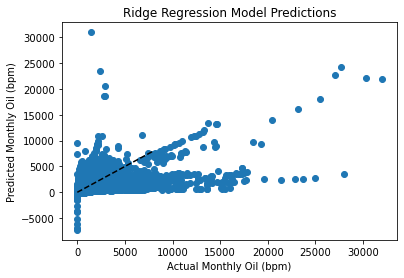

In [38]:
# B) Ridge Regression Model Predictions on Testing data set
y_pred_ridge = ridge.predict(X_test)

# Inverse transform the scaled predictions
y_pred_ridge_org = scaler_y.inverse_transform(y_pred_ridge.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_ridge_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Ridge Regression Model Predictions")
plt.show()

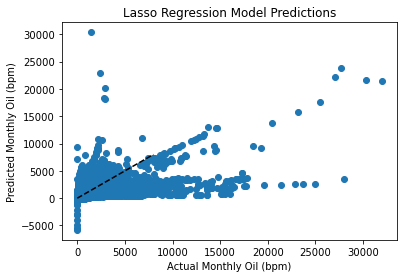

In [39]:
# C) Lasso Regression Model Predictions on Testing data set
y_pred_lasso = lasso.predict(X_test)

# Inverse transform the scaled predictions
y_pred_lasso_org = scaler_y.inverse_transform(y_pred_lasso.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_lasso_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Lasso Regression Model Predictions")
plt.show()

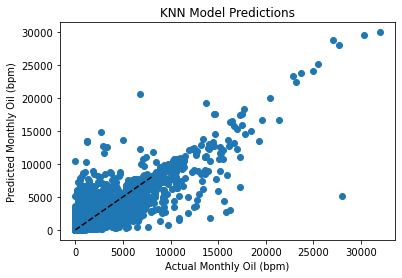

In [40]:
# D) KNN Model Predictions on VTesting data set
y_pred_knn = knn.predict(X_test)

# Inverse transform the scaled predictions
y_pred_knn_org = scaler_y.inverse_transform(y_pred_knn.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_knn_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("KNN Model Predictions")
plt.show()

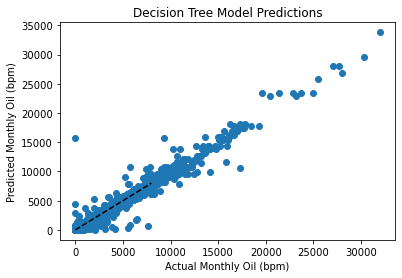

In [41]:
# E) Decision Tree Model Predictions on Testing data set
y_pred_dtree = dtree.predict(X_test)

# Inverse transform the scaled predictions
y_pred_dtree_org = scaler_y.inverse_transform(y_pred_dtree.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_dtree_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Decision Tree Model Predictions")
plt.show()

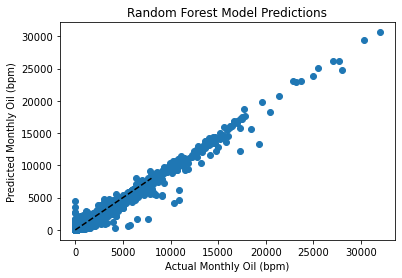

In [42]:
# F) Random Forest Model Predictions on Testing data set
y_pred_rforest = rforest.predict(X_test)

# Inverse transform the scaled predictions
y_pred_rforest_org = scaler_y.inverse_transform(y_pred_rforest.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_rforest_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Random Forest Model Predictions")
plt.show()

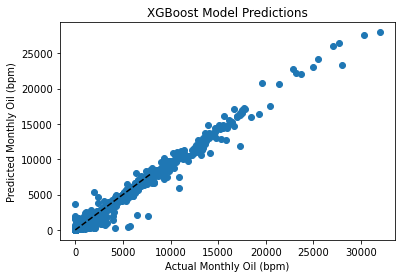

In [43]:
# G) XGBoost Model Predictions on Testing data set
y_pred_xgb = xgboost.predict(X_test)

# Inverse transform the scaled predictions
y_pred_xgb_org = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_xgb_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("XGBoost Model Predictions")
plt.show()

We have seen that Random Forest is been performing best in both the Validation and Testing dataset, based on model evaluation like R2 being highest (i.e. 0.98 to 0.9812) & RMSE being the lowest of all other models (i.e. 0.134 to 0.137) . 

---Summary---

a) Validation results for Random Forest:-

    R2 score: 0.98

    RMSE: 0.134

b) Testing results for Random Forest:-

    R2 score: 0.9812

    RMSE: 0.137

Thus, we can select "Random Forest" for our given problem in oil production forecasting. 

# Collecting prediction results for Power BI Visualization

In [44]:
predict_df = test_df.copy(deep=True)
# Load the dataset and create the features and target variable
predict_X = predict_df[['Entity ID','Monthly Gas','Monthly Water','Well Count','Producing Month Number','GOR']]
predict_y = predict_df['Monthly Oil']


# transform features in X 
predict_X_scaled = scaler_X.transform(predict_X)
predict_y = rforest.predict(predict_X_scaled)
predict_y = scaler_y.inverse_transform(predict_y.reshape(-1, 1))

predict_df['Monthly Oil']  = predict_y
predict_df['Type'] = "Predict"
predict_df.to_excel('predict_visualization.xlsx', sheet_name='Sheet1', index=False)


## Part 3. Forecasting Oil Production using ARIMA model

In [45]:
# Taking particular data for Entity ID 12865844 (Unique Well) for forecasting oil production

df5 = df[df['Entity ID'] == 128658344]
df5

,Entity ID,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Entity Type,Producing Month Number,GOR,Type
5490,128658344,1984-01-01,935.0,26.0,17147,1,30.16,0.84,553.13,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,1,0.027807,Train
5491,128658344,1984-02-01,726.0,0.0,13605,1,25.03,0.00,469.14,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,2,0.000000,Train
5492,128658344,1984-03-01,788.0,0.0,15157,1,25.42,0.00,488.94,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,3,0.000000,Train
5493,128658344,1984-04-01,759.0,0.0,14954,1,25.30,0.00,498.47,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,4,0.000000,Train
5494,128658344,1984-05-01,818.0,28.0,16492,1,26.39,0.90,532.00,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,5,0.034230,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,128658344,2022-05-01,61.0,173.0,7596,1,1.97,5.58,245.03,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,461,2.836066,Train
5951,128658344,2022-06-01,62.0,157.0,7657,1,2.07,5.23,255.23,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,462,2.532258,Train
5952,128658344,2022-07-01,64.0,169.0,7993,1,2.06,5.45,257.84,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,463,2.640625,Train
5953,128658344,2022-08-01,61.0,190.0,7601,1,1.97,6.13,245.19,AMHYDRITE & DOLOMITE,JOHNSON GBSA UNIT,COM,464,3.114754,Train


In [46]:
# Convert 'Monthly Production Date' column to datetime format
df5['Monthly Production Date'] = pd.to_datetime(df5['Monthly Production Date'])

# Set 'Monthly Production Date' column as the index of the DataFrame
df5.set_index('Monthly Production Date', inplace=True)


In [47]:
# Select Monthly Oil Production in monthly_oil_1 to anayse for first well
monthly_oil_1 = df5['Monthly Oil']
monthly_oil_1

Monthly Production Date
1984-01-01    935.0
1984-02-01    726.0
1984-03-01    788.0
1984-04-01    759.0
1984-05-01    818.0
              ...  
2022-05-01     61.0
2022-06-01     62.0
2022-07-01     64.0
2022-08-01     61.0
2022-09-01     56.0
Name: Monthly Oil, Length: 465, dtype: float64

Text(0.5, 1.0, 'Decline Curve')

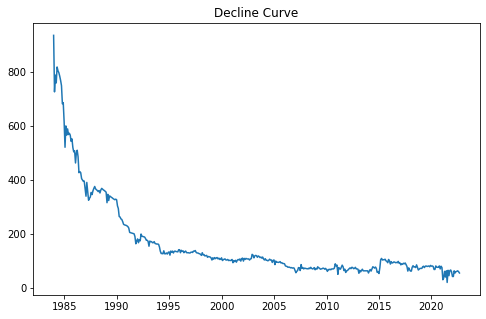

In [48]:
# Set the figure size
plt.figure(figsize=(8,5))

# Plot the 'monthly_oil_1' data
plt.plot(monthly_oil_1)

# Set the title of the plot
plt.title('Decline Curve')

In [49]:
# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(monthly_oil_1, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(monthly_oil_1, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)

c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Best (p, d, q) tuple: (2, 1, 1)


c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


The above code is trying to find the best set of parameters (p, d, q) to use for the ARIMA model to forecast future values of the 'monthly_oil_1' time series. The range for p, d, and q is defined, and a list of all possible combinations of (p, d, q) tuples is created. For each combination of parameters, an ARIMA model is fitted to the time series and evaluated based on the Akaike Information Criterion (AIC). The combination of parameters that produces the lowest AIC value is selected as the best set of parameters. The ARIMA model is then re-fitted using the best set of parameters, and a forecast is made for the next time step. Finally, the best set of parameters and the forecasted value are printed

In [50]:
predictions = model_arima.fit().predict()

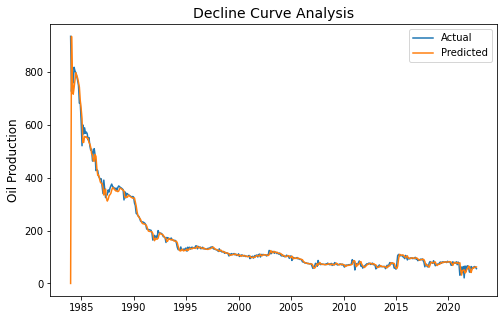

In [51]:
# Create a new figure with the specified size
plt.figure(figsize=(8, 5))

# Plot the actual and predicted values
plt.plot(monthly_oil_1, label="Actual")
plt.plot(predictions, label="Predicted")

# Set the title and axis labels
plt.title('Decline Curve Analysis', fontsize=14)
plt.ylabel('Oil Production', fontsize=12)

# Add a legend to the plot
plt.legend()

In [52]:
# Generate 20 forecasted values using the fitted ARIMA model
forecast_values = model_arima_fit.forecast(steps=20)

# Print the forecasted values
print(forecast_values)


2022-10-01    57.936662
2022-11-01    56.538455
2022-12-01    56.744979
2023-01-01    56.180767
2023-02-01    55.988184
2023-03-01    55.617863
2023-04-01    55.333993
2023-05-01    55.009523
2023-06-01    54.705550
2023-07-01    54.392691
2023-08-01    54.085073
2023-09-01    53.775901
2023-10-01    53.468441
2023-11-01    53.161120
2023-12-01    52.854693
2024-01-01    52.548794
2024-02-01    52.243597
2024-03-01    51.939017
2024-04-01    51.635092
2024-05-01    51.331802
Freq: MS, Name: predicted_mean, dtype: float64


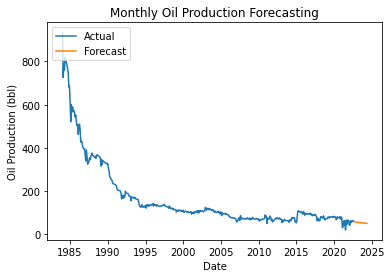

In [53]:
# Plot the actual and forecasted values of the monthly oil production
plt.plot(monthly_oil_1[-500:-1], label='Actual')
plt.plot(forecast_values, label='Forecast')

# Add a legend to the plot and set its location
plt.legend(loc='upper left')

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Monthly Oil Production Forecasting')
plt.xlabel('Date')
plt.ylabel('Oil Production (bbl)')

# Display the plot
plt.show()


In [54]:
# Filter the DataFrame to only include rows where 'Entity ID' equals 127168831
df7 = df[df['Entity ID'] == 127168831]

# Print the filtered DataFrame
df7


,Entity ID,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Entity Type,Producing Month Number,GOR,Type
371474,127168831,1978-10-01,274.0,73.0,5842,1,8.84,2.35,188.45,GRAYBURG,"WITCHER, J. E.",COM,1,0.266423,Train
371475,127168831,1978-11-01,325.0,0.0,6972,1,10.83,0.00,232.40,GRAYBURG,"WITCHER, J. E.",COM,2,0.000000,Train
371476,127168831,1978-12-01,308.0,120.0,6654,1,9.94,3.87,214.65,GRAYBURG,"WITCHER, J. E.",COM,3,0.389610,Train
371477,127168831,1979-01-01,357.0,167.0,6101,1,11.52,5.39,196.81,GRAYBURG,"WITCHER, J. E.",COM,4,0.467787,Train
371478,127168831,1979-02-01,415.0,151.0,5849,1,14.82,5.39,208.89,GRAYBURG,"WITCHER, J. E.",COM,5,0.363855,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371997,127168831,2022-05-01,61.0,21.0,609,1,1.97,0.68,19.65,GRAYBURG,"WITCHER, J. E.",COM,524,0.344262,Train
371998,127168831,2022-06-01,63.0,24.0,636,1,2.10,0.80,21.20,GRAYBURG,"WITCHER, J. E.",COM,525,0.380952,Train
371999,127168831,2022-07-01,57.0,19.0,577,1,1.84,0.61,18.61,GRAYBURG,"WITCHER, J. E.",COM,526,0.333333,Train
372000,127168831,2022-08-01,58.0,20.0,580,1,1.87,0.65,18.71,GRAYBURG,"WITCHER, J. E.",COM,527,0.344828,Train


In [55]:
# Convert the 'Monthly Production Date' column to datetime format
df7['Monthly Production Date'] = pd.to_datetime(df7['Monthly Production Date'])

# Set the index of the DataFrame to the 'Monthly Production Date' column
df7 = df7.set_index('Monthly Production Date')


Text(0.5, 1.0, 'Decline Curve')

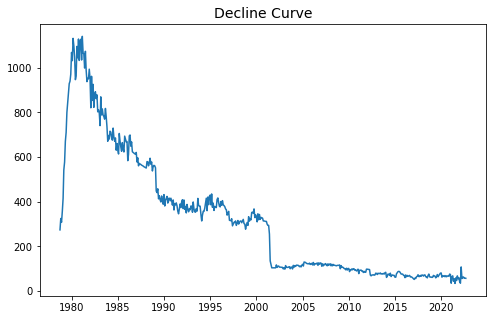

In [56]:
# Extract the 'Monthly Oil' column from df7 and assign it to monthly_oil_3
monthly_oil_3 = df7['Monthly Oil']

# Create a new figure with size (8, 5)
plt.figure(figsize=(8, 5))

# Plot the monthly_oil_3 time series
plt.plot(monthly_oil_3)

# Add a title to the plot
plt.title("Decline Curve", fontsize=14)


In [57]:
# Select Monthly Oil Production in monthly_oil_3 to anayse for second well

monthly_oil_3

Monthly Production Date
1978-10-01    274.0
1978-11-01    325.0
1978-12-01    308.0
1979-01-01    357.0
1979-02-01    415.0
              ...  
2022-05-01     61.0
2022-06-01     63.0
2022-07-01     57.0
2022-08-01     58.0
2022-09-01     57.0
Name: Monthly Oil, Length: 528, dtype: float64

In [58]:
# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(monthly_oil_3, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(monthly_oil_3, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)


c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Best (p, d, q) tuple: (2, 1, 1)


c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
predictions = model_arima.fit().predict()

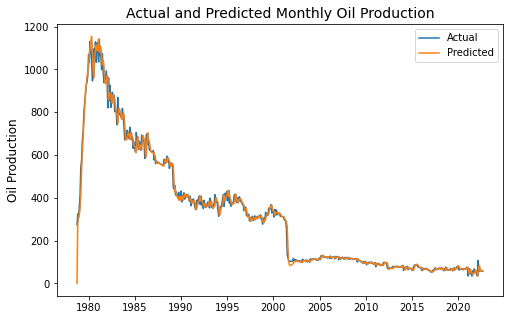

In [60]:
# Create a new figure with a size of 8 inches by 5 inches
fig = plt.figure(figsize=(8,5))

# Plot the actual time series data on the figure
plt.plot(monthly_oil_3, label="Actual")

# Plot the predicted values on the same figure
plt.plot(predictions, label="Predicted")

# Add a title to the figure with a font size of 20
plt.title('Actual and Predicted Monthly Oil Production', fontsize=14)

# Add a label to the y-axis with a font size of 16
plt.ylabel('Oil Production', fontsize=12)

# Add a legend to the figure
plt.legend()


In [61]:
# Generate a forecast of 20 future values using the ARIMA model
forecast_values = model_arima_fit.forecast(20)

# Print the forecast values
print(forecast_values)


2022-10-01    57.062147
2022-11-01    56.669492
2022-12-01    56.491212
2023-01-01    56.231373
2023-02-01    56.020138
2023-03-01    55.799573
2023-04-01    55.594803
2023-05-01    55.394302
2023-06-01    55.202741
2023-07-01    55.017654
2023-08-01    54.839742
2023-09-01    54.668323
2023-10-01    54.503338
2023-11-01    54.344467
2023-12-01    54.191519
2024-01-01    54.044256
2024-02-01    53.902475
2024-03-01    53.765968
2024-04-01    53.634541
2024-05-01    53.508004
Freq: MS, Name: predicted_mean, dtype: float64


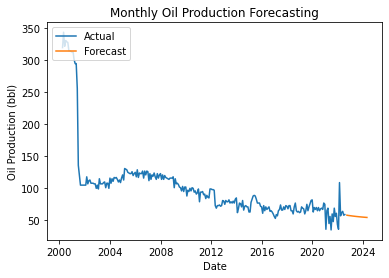

In [62]:
# Plot actual and forecasted monthly oil production values
plt.plot(monthly_oil_3[-270:-1], label='Actual')
plt.plot(forecast_values, label='Forecast')

# Add legend, title, and axis labels
plt.legend(loc='upper left')
plt.title('Monthly Oil Production Forecasting')
plt.xlabel('Date')
plt.ylabel('Oil Production (bbl)')

# Display the plot
plt.show()


In [63]:
# group by entity id and count the number of rows for each group
grouped_df = df.groupby('Entity ID').size().reset_index(name='count')

# filter the groups with count greater than 400
filtered_df = grouped_df[grouped_df['count'] > 400]

# print the filtered dataframe
print(filtered_df.head(20))

    Entity ID  count
0      474853    596
1      474870    594
2      475095    593
3      475107    594
4   127168547    537
5   127168569    597
6   127168797    454
7   127168815    424
8   127168831    528
15  127168910    597
16  127178942    597
17  127178981    597
18  127179173    492
19  127179184    456
20  127179206    415
25  127179274    540
26  127179275    597
27  127189161    597
28  127189229    597
29  127189246    547


In [64]:
# Filter the DataFrame for rows where 'Entity ID' is equal to 127179274
df8 = df[df['Entity ID'] == 127179274]

# Display the filtered DataFrame
df8


,Entity ID,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Entity Type,Producing Month Number,GOR,Type
364666,127179274,1977-10-01,324.0,241.0,2891,1,10.45,7.77,93.26,AMHY,SOUTH FOSTER UNIT,COM,1,0.743827,Train
364667,127179274,1977-11-01,216.0,0.0,1789,1,7.20,0.00,59.63,AMHY,SOUTH FOSTER UNIT,COM,2,0.000000,Train
364668,127179274,1977-12-01,288.0,311.0,1744,1,9.29,10.03,56.26,AMHY,SOUTH FOSTER UNIT,COM,3,1.079861,Train
364669,127179274,1978-01-01,360.0,299.0,1702,1,11.61,9.65,54.90,AMHY,SOUTH FOSTER UNIT,COM,4,0.830556,Train
364670,127179274,1978-02-01,408.0,237.0,1600,1,14.57,8.46,57.14,AMHY,SOUTH FOSTER UNIT,COM,5,0.580882,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365201,127179274,2022-05-01,5.0,16.0,137,1,0.16,0.52,4.42,AMHY,SOUTH FOSTER UNIT,COM,536,3.200000,Train
365202,127179274,2022-06-01,5.0,18.0,131,1,0.17,0.60,4.37,AMHY,SOUTH FOSTER UNIT,COM,537,3.600000,Train
365203,127179274,2022-07-01,6.0,19.0,150,1,0.19,0.61,4.84,AMHY,SOUTH FOSTER UNIT,COM,538,3.166667,Train
365204,127179274,2022-08-01,6.0,20.0,169,1,0.19,0.65,5.45,AMHY,SOUTH FOSTER UNIT,COM,539,3.333333,Train


In [65]:
# Convert 'Monthly Production Date' column to datetime format
df8['Monthly Production Date'] = pd.to_datetime(df8['Monthly Production Date'])

# Set 'Monthly Production Date' column as the index of the DataFrame
df8.set_index('Monthly Production Date', inplace=True)

# Extract 'Monthly Oil' column as a Series
monthly_oil_4 = df8['Monthly Oil']


Text(0.5, 1.0, 'Decline Curve')

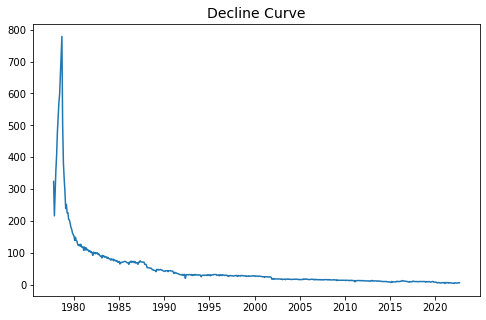

In [66]:
# Set the size of the figure
fig = plt.figure(figsize=(8,5))

# Plot the 'monthly_oil_4' data
plt.plot(monthly_oil_4)

# Set the title of the plot
plt.title("Decline Curve", fontsize=14)


In [67]:
# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(monthly_oil_4, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(monthly_oil_4, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)


c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\georg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Best (p, d, q) tuple: (2, 1, 2)


In [68]:
# Fit the ARIMA model and generate predictions
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.predict()


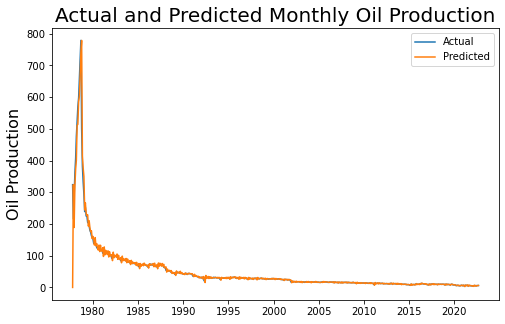

In [69]:
# Create a figure with a size of 8x5 inches
plt.figure(figsize=(8,5))

# Plot the actual and predicted values
plt.plot(monthly_oil_4, label="Actual")
plt.plot(predictions, label="Predicted")

# Add a title and axis labels
plt.title('Actual and Predicted Monthly Oil Production', fontsize=20)
plt.ylabel('Oil Production', fontsize=16)

# Add a legend to the plot
plt.legend()


In [70]:
# Generate a forecast of 20 future values using the ARIMA model
forecast_values = model_arima_fit.forecast(20)

# Display the forecasted values
print(forecast_values)


2022-10-01    5.994694
2022-11-01    5.820723
2022-12-01    6.018686
2023-01-01    5.866846
2023-02-01    5.956989
2023-03-01    5.917470
2023-04-01    5.925179
2023-05-01    5.932622
2023-06-01    5.921101
2023-07-01    5.931032
2023-08-01    5.924554
2023-09-01    5.927794
2023-10-01    5.926790
2023-11-01    5.926598
2023-12-01    5.927223
2024-01-01    5.926598
2024-02-01    5.927047
2024-03-01    5.926797
2024-04-01    5.926895
2024-05-01    5.926886
Freq: MS, Name: predicted_mean, dtype: float64


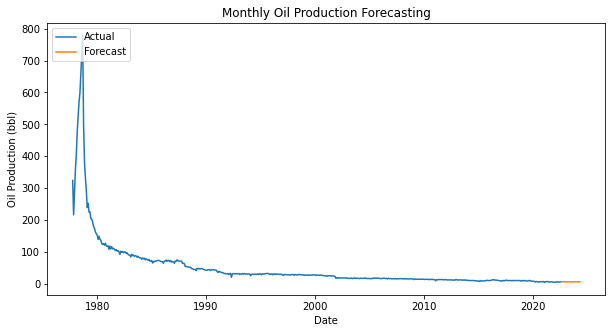

In [71]:
# Set the figure size to 10x5 inches
plt.figure(figsize=(10, 5))

# Plot the actual values of the last 550 months of oil production
plt.plot(monthly_oil_4[-550:-1], label='Actual')

# Plot the forecasted values
plt.plot(forecast_values, label='Forecast')

# Add a legend to the plot in the upper left corner
plt.legend(loc='upper left')

# Add a title to the plot
plt.title('Monthly Oil Production Forecasting')

# Label the x-axis as 'Date'
plt.xlabel('Date')

# Label the y-axis as 'Oil Production (bbl)'
plt.ylabel('Oil Production (bbl)')

# Show the plot
plt.show()


### Final Verdict

In conclusion, the development of a data-driven method for predicting oil production, which aims to overcome the limitations of traditional methods, is a significant step towards optimizing production and enabling informed decisions in the petroleum industry. Data preprocessing is employed to obtain clean data for making it ready for analysis. Various machine learning techniques are used to build the forecasting model and are evaluated based on R2 score and root mean square error. We observed that, random forest performs best on our dataset with R2 score close to 0.99 and RMSE being as low as 0.10. We have visualized these predictions with the help of Power BI too. We have also used ARIMA model of time-series analysis to forecast the data for individual wells. Overall, this method has the potential to provide a more accurate and efficient way of predicting oil production, enabling companies to optimize production, reduce costs, and make informed decisions, ultimately positively impacting their bottom line.